In [2]:
import pandas as pd
import numpy as np

In [9]:
reviews = pd.read_csv('./Dataset/review.csv', usecols=['review_id', 'date'])

In [16]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews.describe(datetime_is_numeric=True)

,date
count,3838105
mean,2019-04-25 19:46:33.480205312
min,2017-01-01 00:00:35
25%,2018-03-01 19:34:56
50%,2019-03-18 13:37:03
75%,2020-06-10 02:13:39
max,2022-01-19 19:48:45


In [17]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838105 entries, 0 to 3838104
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   review_id  object        
 1   date       datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 58.6+ MB


In [19]:
reviews.head(5)

,review_id,date
0,KU_O5udG6zpxOg-VcAEodg,2018-07-07 22:09:11
1,Sx8TMOWLNuJBWer-0pcmoA,2017-01-14 20:54:15
2,lUUhg8ltDsUZ9h0xnwY4Dg,2018-07-17 03:30:07
3,-P5E9BYUaK7s3PwBF5oAyg,2017-02-19 13:32:05
4,YbMyvlDA2W3Py5lTz8VK-A,2017-01-02 03:17:34


In [21]:
sorted_reviews = reviews.sort_values(by="date")
sorted_reviews

,review_id,date
1973644,bDY925lBfBeUBTT0LXPf4w,2017-01-01 00:00:35
3518187,Pmei8lu0LYxKg_PewKh2NA,2017-01-01 00:00:41
1602761,8qQNX3Wljb-5mM3CvtR5IQ,2017-01-01 00:00:52
493287,IvSs2JuV_phOQeGQZz33Pw,2017-01-01 00:01:12
858905,DwC5LVTyvhpDctzn9LvDqg,2017-01-01 00:01:58
...,...,...
2673336,11yPqFYtkACY7TWKc5MNzA,2022-01-19 19:48:13
1456249,L0KaPI67DcTN4wwqfz6A3w,2022-01-19 19:48:16
3422266,3wqrZowVYwSPEh8p5nLn1g,2022-01-19 19:48:19
2973217,gUkdqUCMJCJ38HVlLZxlgg,2022-01-19 19:48:25


In [22]:
sorted_reviews['next_review_date'] = sorted_reviews['date'].shift(-1)
sorted_reviews

,review_id,date,next_review_date
1973644,bDY925lBfBeUBTT0LXPf4w,2017-01-01 00:00:35,2017-01-01 00:00:41
3518187,Pmei8lu0LYxKg_PewKh2NA,2017-01-01 00:00:41,2017-01-01 00:00:52
1602761,8qQNX3Wljb-5mM3CvtR5IQ,2017-01-01 00:00:52,2017-01-01 00:01:12
493287,IvSs2JuV_phOQeGQZz33Pw,2017-01-01 00:01:12,2017-01-01 00:01:58
858905,DwC5LVTyvhpDctzn9LvDqg,2017-01-01 00:01:58,2017-01-01 00:03:15
...,...,...,...
2673336,11yPqFYtkACY7TWKc5MNzA,2022-01-19 19:48:13,2022-01-19 19:48:16
1456249,L0KaPI67DcTN4wwqfz6A3w,2022-01-19 19:48:16,2022-01-19 19:48:19
3422266,3wqrZowVYwSPEh8p5nLn1g,2022-01-19 19:48:19,2022-01-19 19:48:25
2973217,gUkdqUCMJCJ38HVlLZxlgg,2022-01-19 19:48:25,2022-01-19 19:48:45


In [23]:
sorted_reviews['diff'] = sorted_reviews['next_review_date'] - sorted_reviews['date']
sorted_reviews

,review_id,date,next_review_date,diff
1973644,bDY925lBfBeUBTT0LXPf4w,2017-01-01 00:00:35,2017-01-01 00:00:41,0 days 00:00:06
3518187,Pmei8lu0LYxKg_PewKh2NA,2017-01-01 00:00:41,2017-01-01 00:00:52,0 days 00:00:11
1602761,8qQNX3Wljb-5mM3CvtR5IQ,2017-01-01 00:00:52,2017-01-01 00:01:12,0 days 00:00:20
493287,IvSs2JuV_phOQeGQZz33Pw,2017-01-01 00:01:12,2017-01-01 00:01:58,0 days 00:00:46
858905,DwC5LVTyvhpDctzn9LvDqg,2017-01-01 00:01:58,2017-01-01 00:03:15,0 days 00:01:17
...,...,...,...,...
2673336,11yPqFYtkACY7TWKc5MNzA,2022-01-19 19:48:13,2022-01-19 19:48:16,0 days 00:00:03
1456249,L0KaPI67DcTN4wwqfz6A3w,2022-01-19 19:48:16,2022-01-19 19:48:19,0 days 00:00:03
3422266,3wqrZowVYwSPEh8p5nLn1g,2022-01-19 19:48:19,2022-01-19 19:48:25,0 days 00:00:06
2973217,gUkdqUCMJCJ38HVlLZxlgg,2022-01-19 19:48:25,2022-01-19 19:48:45,0 days 00:00:20


In [24]:
sorted_reviews[:-1]

,review_id,date,next_review_date,diff
1973644,bDY925lBfBeUBTT0LXPf4w,2017-01-01 00:00:35,2017-01-01 00:00:41,0 days 00:00:06
3518187,Pmei8lu0LYxKg_PewKh2NA,2017-01-01 00:00:41,2017-01-01 00:00:52,0 days 00:00:11
1602761,8qQNX3Wljb-5mM3CvtR5IQ,2017-01-01 00:00:52,2017-01-01 00:01:12,0 days 00:00:20
493287,IvSs2JuV_phOQeGQZz33Pw,2017-01-01 00:01:12,2017-01-01 00:01:58,0 days 00:00:46
858905,DwC5LVTyvhpDctzn9LvDqg,2017-01-01 00:01:58,2017-01-01 00:03:15,0 days 00:01:17
...,...,...,...,...
330915,z49cuQBmv3pZfRLMdi8jcw,2022-01-19 19:47:59,2022-01-19 19:48:13,0 days 00:00:14
2673336,11yPqFYtkACY7TWKc5MNzA,2022-01-19 19:48:13,2022-01-19 19:48:16,0 days 00:00:03
1456249,L0KaPI67DcTN4wwqfz6A3w,2022-01-19 19:48:16,2022-01-19 19:48:19,0 days 00:00:03
3422266,3wqrZowVYwSPEh8p5nLn1g,2022-01-19 19:48:19,2022-01-19 19:48:25,0 days 00:00:06


In [32]:
df = sorted_reviews.drop(sorted_reviews.index[-1])
df['diff_in_secs'] = df['diff'].dt.total_seconds()
df

,review_id,date,next_review_date,diff,diff_in_secs
1973644,bDY925lBfBeUBTT0LXPf4w,2017-01-01 00:00:35,2017-01-01 00:00:41,0 days 00:00:06,6.0
3518187,Pmei8lu0LYxKg_PewKh2NA,2017-01-01 00:00:41,2017-01-01 00:00:52,0 days 00:00:11,11.0
1602761,8qQNX3Wljb-5mM3CvtR5IQ,2017-01-01 00:00:52,2017-01-01 00:01:12,0 days 00:00:20,20.0
493287,IvSs2JuV_phOQeGQZz33Pw,2017-01-01 00:01:12,2017-01-01 00:01:58,0 days 00:00:46,46.0
858905,DwC5LVTyvhpDctzn9LvDqg,2017-01-01 00:01:58,2017-01-01 00:03:15,0 days 00:01:17,77.0
...,...,...,...,...,...
330915,z49cuQBmv3pZfRLMdi8jcw,2022-01-19 19:47:59,2022-01-19 19:48:13,0 days 00:00:14,14.0
2673336,11yPqFYtkACY7TWKc5MNzA,2022-01-19 19:48:13,2022-01-19 19:48:16,0 days 00:00:03,3.0
1456249,L0KaPI67DcTN4wwqfz6A3w,2022-01-19 19:48:16,2022-01-19 19:48:19,0 days 00:00:03,3.0
3422266,3wqrZowVYwSPEh8p5nLn1g,2022-01-19 19:48:19,2022-01-19 19:48:25,0 days 00:00:06,6.0


In [48]:
df['diff_in_secs'].value_counts()

1.0       128771
2.0       124369
3.0       118262
4.0       114633
5.0       109578
           ...  
2002.0         1
1867.0         1
4425.0         1
3008.0         1
1677.0         1
Name: diff_in_secs, Length: 2496, dtype: int64

In [50]:
df['diff_in_secs'].describe()

count    3.838104e+06
mean     4.152907e+01
std      8.926128e+01
min      0.000000e+00
25%      8.000000e+00
50%      2.100000e+01
75%      4.500000e+01
max      8.637000e+03
Name: diff_in_secs, dtype: float64

[Text(0.5, 0, 'Tiempo (s)'),
 Text(0.5, 1.0, 'Distribución del tiempo entre reviews en el sitio')]

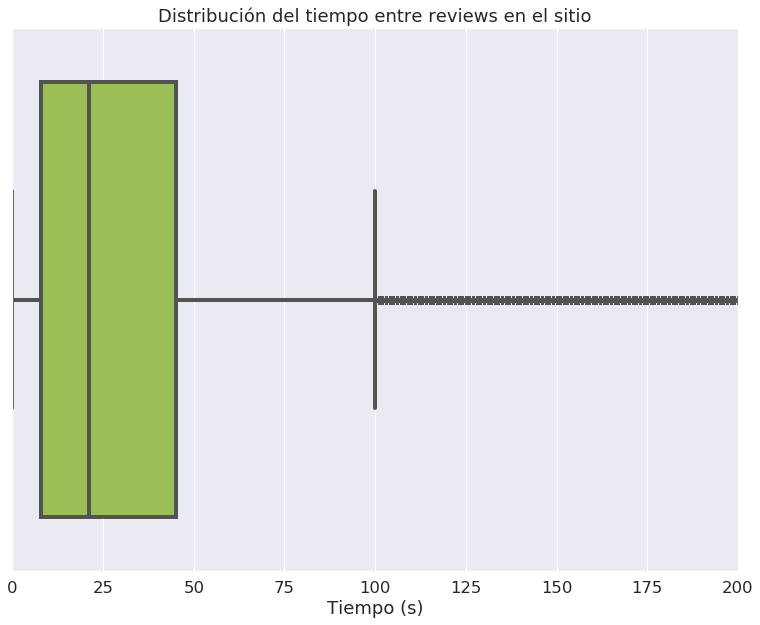

In [75]:
# df.boxplot(column='diff_in_secs', rot=90)

import seaborn as sns

# sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(13,10)}, font_scale=1.5)
ax = sns.boxplot(df['diff_in_secs'], color='#a1d046', linewidth=4)
ax.set(xlim=(0, 200))
ax.set(title='Distribución del tiempo entre reviews en el sitio', xlabel='Tiempo (s)')